In [1]:
import pandas as pd
from pandas import DataFrame
import os
import sys
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.show()
import glob
import seaborn as sns


outdir='/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_analysis/Surface_ocean_SAG_analysis/'
if os.path.isdir(outdir):
    print(outdir, "already exists.")
else:
    os.mkdir(outdir)
    print(outdir, "is created.")

os.chdir('/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_analysis/Surface_ocean_SAG_analysis/')    

images='/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_images/Surface_ocean_SAG_analysis'
if os.path.isdir(images):
    print(images, "already exists.")
else:
    os.mkdir(images)
    print(images, "is created.")
    
matplotlib.__version__

/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_analysis/Surface_ocean_SAG_analysis/ already exists.
/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_images/Surface_ocean_SAG_analysis already exists.


'3.3.3'

In [2]:
FACS_558=pd.read_csv('/mnt/scgc/simon/microg2p/Data/Herndl_WGS/FACS_csv/AH-558-data-export.csv')
SAGs_558=pd.read_csv('/mnt/scgc/simon/microg2p/Data/Herndl_WGS/AH-558_assembly_stats.csv', index_col=0)
AH_558=SAGs_558.merge(FACS_558, on='well')
AH_558.rename(columns={'well':'name', 'name':'well'})
AH_558.to_csv(outdir+ 'AH-558.Assembly_and_FACS.csv')

FACS_716=pd.read_csv('/mnt/scgc/simon/microg2p/Data/Herndl_WGS/FACS_csv/AH-716-data-export.csv')
SAGs_716=pd.read_csv('/mnt/scgc/simon/microg2p/Data/Herndl_WGS/AH-716_210512_VH00511_11_AAAFVVYHV_assembly_stats.csv', index_col=0)
AH_716=SAGs_716.merge(FACS_716, on='well')
AH_716.rename(columns={'well':'name', 'name':'well'})
AH_716.to_csv(outdir+ 'AH-716.Assembly_and_FACS.csv')

                     
FACS_736=pd.read_csv('/mnt/scgc/simon/microg2p/Data/Herndl_WGS/FACS_csv/AH-736-data-export.csv')
SAGs_736=pd.read_csv('/mnt/scgc/simon/microg2p/Data/Herndl_WGS/AH-736_assembly_stats.csv', index_col=0)
AH_736=SAGs_736.merge(FACS_736, on='well')
AH_736.rename(columns={'well':'name', 'name':'well'})
AH_736.to_csv(outdir+ 'AH-736.Assembly_and_FACS.csv')
                     



surf_SAGs=pd.concat([AH_558, AH_716, AH_736])

surf_SAGs=surf_SAGs[~surf_SAGs.name.str.contains('-H')]


surf_SAGs.insert(2,'Plate',surf_SAGs['name'].str[:6])
surf_SAGs.insert(18,'SSU_classification_3','')
surf_SAGs.to_csv(outdir+'Sintes_surface_all_assembeled_1cell_SAGs.csv')

surf_SAGs


,well,name,Plate,well_type,wga_cp,wgs_run_id,raw_read_count,final_assembly_length,max_contig_length,gc_content,...,SSU_classification_3,notes,eventnum,X531.40..488.,X572.27..488.,X692.40..488.,Trigger.Pulse.Width,SSC,FSC,estimated_diameter
0,A01,AH-558-A01,AH-558,1 cell,15.934444,190222_NB502014_0102_AHHW3LAFXY,51.0,NaN,NaN,NaN,...,,too few starting reads,779,91.810135,8.476619,8.498089,5787,12.138569,11.770659,0.31
1,A02,AH-558-A02,AH-558,1 cell,15.934444,190222_NB502014_0102_AHHW3LAFXY,42198.0,NaN,0.0,NaN,...,,assembled length less than 20kbp threshold,6047,19.659800,2.339595,1.026629,5103,38.983547,4.960856,0.22
2,A11,AH-558-A11,AH-558,1 cell,15.934444,190222_NB502014_0102_AHHW3LAFXY,1462924.0,NaN,NaN,NaN,...,,no contigs passed length filter,37632,5.598967,1.023028,1.025187,6928,137.771744,21.658697,0.39
3,A22,AH-558-A22,AH-558,1 cell,1.631078,190222_NB502014_0102_AHHW3LAFXY,10.0,NaN,NaN,NaN,...,,too few starting reads,71692,5.096539,1.022166,1.024035,5852,6.631232,3.191297,0.18
4,B02,AH-558-B02,AH-558,1 cell,4.899164,190222_NB502014_0102_AHHW3LAFXY,1811927.0,NaN,NaN,NaN,...,,no contigs passed length filter,154641,28.252039,2.673394,1.022310,5729,4.342055,10.093187,0.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,P11,AH-736-P11,AH-736,1 cell,1.574596,AH-736,2765288.0,722775.0,117558.0,29.163571,...,,NaN,1875805,22.821144,3.838552,2.225108,5105,27.881267,6.621919,0.27
344,P13,AH-736-P13,AH-736,1 cell,1.801092,AH-736,2757855.0,402041.0,51217.0,32.046483,...,,NaN,1867834,47.194258,4.463949,19.171399,7310,32.735174,30.406833,0.49
345,P14,AH-736-P14,AH-736,1 cell,1.492088,AH-736,2723082.0,411973.0,36833.0,49.780447,...,,NaN,1860708,7.566695,2.444120,5.935229,6392,10.750610,10.331423,0.32
346,P15,AH-736-P15,AH-736,1 cell,1.586822,AH-736,2683061.0,741505.0,95209.0,29.929131,...,,NaN,1853959,31.264836,2.034280,1.023604,6939,17.888070,7.091009,0.27


In [3]:
surf_SAGs['gate']='Respiring cells (RSG-positive)'
surf_SAGs

,well,name,Plate,well_type,wga_cp,wgs_run_id,raw_read_count,final_assembly_length,max_contig_length,gc_content,...,notes,eventnum,X531.40..488.,X572.27..488.,X692.40..488.,Trigger.Pulse.Width,SSC,FSC,estimated_diameter,gate
0,A01,AH-558-A01,AH-558,1 cell,15.934444,190222_NB502014_0102_AHHW3LAFXY,51.0,NaN,NaN,NaN,...,too few starting reads,779,91.810135,8.476619,8.498089,5787,12.138569,11.770659,0.31,Respiring cells (RSG-positive)
1,A02,AH-558-A02,AH-558,1 cell,15.934444,190222_NB502014_0102_AHHW3LAFXY,42198.0,NaN,0.0,NaN,...,assembled length less than 20kbp threshold,6047,19.659800,2.339595,1.026629,5103,38.983547,4.960856,0.22,Respiring cells (RSG-positive)
2,A11,AH-558-A11,AH-558,1 cell,15.934444,190222_NB502014_0102_AHHW3LAFXY,1462924.0,NaN,NaN,NaN,...,no contigs passed length filter,37632,5.598967,1.023028,1.025187,6928,137.771744,21.658697,0.39,Respiring cells (RSG-positive)
3,A22,AH-558-A22,AH-558,1 cell,1.631078,190222_NB502014_0102_AHHW3LAFXY,10.0,NaN,NaN,NaN,...,too few starting reads,71692,5.096539,1.022166,1.024035,5852,6.631232,3.191297,0.18,Respiring cells (RSG-positive)
4,B02,AH-558-B02,AH-558,1 cell,4.899164,190222_NB502014_0102_AHHW3LAFXY,1811927.0,NaN,NaN,NaN,...,no contigs passed length filter,154641,28.252039,2.673394,1.022310,5729,4.342055,10.093187,0.29,Respiring cells (RSG-positive)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,P11,AH-736-P11,AH-736,1 cell,1.574596,AH-736,2765288.0,722775.0,117558.0,29.163571,...,NaN,1875805,22.821144,3.838552,2.225108,5105,27.881267,6.621919,0.27,Respiring cells (RSG-positive)
344,P13,AH-736-P13,AH-736,1 cell,1.801092,AH-736,2757855.0,402041.0,51217.0,32.046483,...,NaN,1867834,47.194258,4.463949,19.171399,7310,32.735174,30.406833,0.49,Respiring cells (RSG-positive)
345,P14,AH-736-P14,AH-736,1 cell,1.492088,AH-736,2723082.0,411973.0,36833.0,49.780447,...,NaN,1860708,7.566695,2.444120,5.935229,6392,10.750610,10.331423,0.32,Respiring cells (RSG-positive)
346,P15,AH-736-P15,AH-736,1 cell,1.586822,AH-736,2683061.0,741505.0,95209.0,29.929131,...,NaN,1853959,31.264836,2.034280,1.023604,6939,17.888070,7.091009,0.27,Respiring cells (RSG-positive)


In [4]:
with open("/mnt/scgc/simon/microg2p/Data/Lists/contaminated_SAGs.txt") as file:
    bad_SAGs = [line.strip() for line in file]
    
surf_SAGs=surf_SAGs[~surf_SAGs.name.isin(bad_SAGs)]
surf_SAGs.to_csv(outdir+'Sintes_surface_tetramer_decon_1cell_SAGs.csv')
surf_SAGs

,well,name,Plate,well_type,wga_cp,wgs_run_id,raw_read_count,final_assembly_length,max_contig_length,gc_content,...,notes,eventnum,X531.40..488.,X572.27..488.,X692.40..488.,Trigger.Pulse.Width,SSC,FSC,estimated_diameter,gate
0,A01,AH-558-A01,AH-558,1 cell,15.934444,190222_NB502014_0102_AHHW3LAFXY,51.0,NaN,NaN,NaN,...,too few starting reads,779,91.810135,8.476619,8.498089,5787,12.138569,11.770659,0.31,Respiring cells (RSG-positive)
1,A02,AH-558-A02,AH-558,1 cell,15.934444,190222_NB502014_0102_AHHW3LAFXY,42198.0,NaN,0.0,NaN,...,assembled length less than 20kbp threshold,6047,19.659800,2.339595,1.026629,5103,38.983547,4.960856,0.22,Respiring cells (RSG-positive)
2,A11,AH-558-A11,AH-558,1 cell,15.934444,190222_NB502014_0102_AHHW3LAFXY,1462924.0,NaN,NaN,NaN,...,no contigs passed length filter,37632,5.598967,1.023028,1.025187,6928,137.771744,21.658697,0.39,Respiring cells (RSG-positive)
3,A22,AH-558-A22,AH-558,1 cell,1.631078,190222_NB502014_0102_AHHW3LAFXY,10.0,NaN,NaN,NaN,...,too few starting reads,71692,5.096539,1.022166,1.024035,5852,6.631232,3.191297,0.18,Respiring cells (RSG-positive)
4,B02,AH-558-B02,AH-558,1 cell,4.899164,190222_NB502014_0102_AHHW3LAFXY,1811927.0,NaN,NaN,NaN,...,no contigs passed length filter,154641,28.252039,2.673394,1.022310,5729,4.342055,10.093187,0.29,Respiring cells (RSG-positive)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,P11,AH-736-P11,AH-736,1 cell,1.574596,AH-736,2765288.0,722775.0,117558.0,29.163571,...,NaN,1875805,22.821144,3.838552,2.225108,5105,27.881267,6.621919,0.27,Respiring cells (RSG-positive)
344,P13,AH-736-P13,AH-736,1 cell,1.801092,AH-736,2757855.0,402041.0,51217.0,32.046483,...,NaN,1867834,47.194258,4.463949,19.171399,7310,32.735174,30.406833,0.49,Respiring cells (RSG-positive)
345,P14,AH-736-P14,AH-736,1 cell,1.492088,AH-736,2723082.0,411973.0,36833.0,49.780447,...,NaN,1860708,7.566695,2.444120,5.935229,6392,10.750610,10.331423,0.32,Respiring cells (RSG-positive)
346,P15,AH-736-P15,AH-736,1 cell,1.586822,AH-736,2683061.0,741505.0,95209.0,29.929131,...,NaN,1853959,31.264836,2.034280,1.023604,6939,17.888070,7.091009,0.27,Respiring cells (RSG-positive)


In [5]:
surf_SAGs=pd.read_csv(outdir+'Sintes_surface_tetramer_decon_1cell_SAGs.csv', index_col=0)

depth=pd.read_csv('/mnt/scgc/simon/microg2p/Data/Herndl_WGS/O2_consumption_calculations/Plate_depth.csv')
FACS_dates=pd.read_csv('/mnt/scgc/simon/microg2p/Data/Herndl_WGS/O2_consumption_calculations/Plate_dates.csv', dtype = str)

surf_SAGs=surf_SAGs.merge(FACS_dates, on='Plate', how='left')
surf_SAGs=surf_SAGs.merge(depth, on='Plate', how='left')

cols=['date', 'slope (m)', 'intercept (b)']
RSG_conversion=pd.read_csv('/mnt/scgc/simon/microg2p/analyses/JdF_analysis/analysis/O2_consumption_calculation/531_conversion_factors.csv', usecols=cols)
RSG_conversion=RSG_conversion.rename(columns={'date':'FACS date'})
RSG_conversion['FACS date']=RSG_conversion['FACS date'].astype(str)
surf_SAGs=surf_SAGs.merge(RSG_conversion, on='FACS date', how='left')


surf_SAGs['normalized_531_value']=np.where(surf_SAGs['gate']=='Respiring cells (RSG-positive)', ((surf_SAGs['X531.40..488.']*surf_SAGs['slope (m)'])+surf_SAGs['intercept (b)']), '')

surf_SAGs.to_csv(outdir+'Sintes_surface_tetramer_decon_1cell_SAGs_date.csv')
surf_SAGs

,well,name,Plate,well_type,wga_cp,wgs_run_id,raw_read_count,final_assembly_length,max_contig_length,gc_content,...,FSC,estimated_diameter,gate,Sample collection date,FACS date,depth(m),amendment,slope (m),intercept (b),normalized_531_value
0,A01,AH-558-A01,AH-558,1 cell,15.934444,190222_NB502014_0102_AHHW3LAFXY,51.0,NaN,NaN,NaN,...,11.770659,0.31,Respiring cells (RSG-positive),180822,181031,100,na,0.036989,-0.254185,3.1417467013141516
1,A02,AH-558-A02,AH-558,1 cell,15.934444,190222_NB502014_0102_AHHW3LAFXY,42198.0,NaN,0.0,NaN,...,4.960856,0.22,Respiring cells (RSG-positive),180822,181031,100,na,0.036989,-0.254185,0.47300402429403543
2,A11,AH-558-A11,AH-558,1 cell,15.934444,190222_NB502014_0102_AHHW3LAFXY,1462924.0,NaN,NaN,NaN,...,21.658697,0.39,Respiring cells (RSG-positive),180822,181031,100,na,0.036989,-0.254185,-0.04708706073810484
3,A22,AH-558-A22,AH-558,1 cell,1.631078,190222_NB502014_0102_AHHW3LAFXY,10.0,NaN,NaN,NaN,...,3.191297,0.18,Respiring cells (RSG-positive),180822,181031,100,na,0.036989,-0.254185,-0.06567117296653782
4,B02,AH-558-B02,AH-558,1 cell,4.899164,190222_NB502014_0102_AHHW3LAFXY,1811927.0,NaN,NaN,NaN,...,10.093187,0.29,Respiring cells (RSG-positive),180822,181031,100,na,0.036989,-0.254185,0.7908192588582778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,P11,AH-736-P11,AH-736,1 cell,1.574596,AH-736,2765288.0,722775.0,117558.0,29.163571,...,6.621919,0.27,Respiring cells (RSG-positive),190320,190710,5,na,0.035637,-0.291721,0.5215596221313372
835,P13,AH-736-P13,AH-736,1 cell,1.801092,AH-736,2757855.0,402041.0,51217.0,32.046483,...,30.406833,0.49,Respiring cells (RSG-positive),190320,190710,5,na,0.035637,-0.291721,1.390148071796446
836,P14,AH-736-P14,AH-736,1 cell,1.492088,AH-736,2723082.0,411973.0,36833.0,49.780447,...,10.331423,0.32,Respiring cells (RSG-positive),190320,190710,5,na,0.035637,-0.291721,-0.02206551121159428
837,P15,AH-736-P15,AH-736,1 cell,1.586822,AH-736,2683061.0,741505.0,95209.0,29.929131,...,7.091009,0.27,Respiring cells (RSG-positive),190320,190710,5,na,0.035637,-0.291721,0.822468792954844


This is now the same as the /mnt/scgc/simon/microg2p/analyses/JdF_analysis/Jupyter_notebooks/00_Summary_file_creator_and_decon.ipynb notebook. The next step is to add the GTDB classifications as in the /mnt/scgc/simon/microg2p/analyses/JdF_analysis/Jupyter_notebooks/01_GTDB_classification_and_fastANI_clustering.ipynb notebook and then from there create a new notebook that will calculate the O2 consumption model and calculate the O2 consumption rates for every cell.

In [6]:
Sintes_SAGs=pd.read_csv(outdir+'Sintes_surface_tetramer_decon_1cell_SAGs_date.csv', index_col=0)

arc_GTDB_class=pd.read_csv('/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_analysis/gtdb/Surface_ocean_genomes_gtdb_classify_wf_out/classify/gtdbtk.ar122.summary.tsv'
                           , sep='\t')

bac_GTDB_class=pd.read_csv('/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_analysis/gtdb/Surface_ocean_genomes_gtdb_classify_wf_out/classify/gtdbtk.bac120.summary.tsv'
                           , sep='\t')
GTDB_class=pd.concat([arc_GTDB_class, bac_GTDB_class])
GTDB_class.drop_duplicates(inplace=True)
GTDB_class['SAG']=GTDB_class['user_genome'].str[:10]

GTDB_class


,user_genome,classification,fastani_reference,fastani_reference_radius,fastani_taxonomy,fastani_ani,fastani_af,closest_placement_reference,closest_placement_radius,closest_placement_taxonomy,...,closest_placement_af,pplacer_taxonomy,classification_method,note,"other_related_references(genome_id,species_name,radius,ANI,AF)",msa_percent,translation_table,red_value,warnings,SAG
0,AH-558-A07_contigs,d__Archaea;p__Thermoplasmatota;c__Poseidoniia;...,GCA_002497895.1,95.0,d__Archaea;p__Thermoplasmatota;c__Poseidoniia;...,98.30,0.72,GCA_002497895.1,95.0,d__Archaea;p__Thermoplasmatota;c__Poseidoniia;...,...,0.72,d__Archaea;p__Thermoplasmatota;c__Poseidoniia;...,taxonomic classification defined by topology a...,topological placement and ANI have congruent s...,"GCA_013329905.1, s__MGIIb-O1 sp8684u, 95.0, 92...",17.72,11,NaN,NaN,AH-558-A07
1,AH-558-A14_contigs,d__Archaea;p__Thermoproteota;c__Nitrososphaeri...,GCA_003331425.1,95.0,d__Archaea;p__Thermoproteota;c__Nitrososphaeri...,97.73,0.92,GCA_003331425.1,95.0,d__Archaea;p__Thermoproteota;c__Nitrososphaeri...,...,0.92,d__Archaea;p__Thermoproteota;c__Nitrososphaeri...,taxonomic classification defined by topology a...,topological placement and ANI have congruent s...,"GCF_002156965.1, s__Nitrosopumilus catalinensi...",60.17,11,NaN,NaN,AH-558-A14
2,AH-558-A16_contigs,d__Archaea;p__Thermoplasmatota;c__Poseidoniia;...,NaN,NaN,NaN,NaN,NaN,GCA_002497685.1,95.0,d__Archaea;p__Thermoplasmatota;c__Poseidoniia;...,...,0.41,d__Archaea;p__Thermoplasmatota;c__Poseidoniia;...,taxonomic classification defined by topology a...,NaN,"GCA_001875345.1, s__CG-Epi1 sp001875345, 95.0,...",26.29,11,0.966821,Genome not assigned to closest species as it f...,AH-558-A16
3,AH-558-A20_contigs,d__Archaea;p__Thermoproteota;c__Nitrososphaeri...,NaN,NaN,NaN,NaN,NaN,GCA_001510295.1,95.0,d__Archaea;p__Thermoproteota;c__Nitrososphaeri...,...,0.66,d__Archaea;p__Thermoproteota;c__Nitrososphaeri...,taxonomic classification defined by topology a...,NaN,"GCF_000812185.1, s__Nitrosopelagicus brevis, 9...",70.10,11,0.987896,Genome not assigned to closest species as it f...,AH-558-A20
4,AH-558-B13_contigs,d__Archaea;p__Thermoproteota;c__Nitrososphaeri...,GCA_003331425.1,95.0,d__Archaea;p__Thermoproteota;c__Nitrososphaeri...,96.92,0.91,GCA_003331425.1,95.0,d__Archaea;p__Thermoproteota;c__Nitrososphaeri...,...,0.91,d__Archaea;p__Thermoproteota;c__Nitrososphaeri...,taxonomic classification defined by topology a...,topological placement and ANI have congruent s...,"GCF_002156965.1, s__Nitrosopumilus catalinensi...",41.33,11,NaN,NaN,AH-558-B13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,AH-736-P17_contigs,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,NaN,NaN,NaN,NaN,NaN,GCA_004214155.1,95.0,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,...,0.82,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,taxonomic classification defined by topology a...,NaN,"GCA_002684875.1, s__UBA7377 sp002684875, 95.0,...",78.93,11,0.985555,Genome not assigned to closest species as it f...,AH-736-P17
573,AH-736-P19_contigs,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,NaN,NaN,NaN,NaN,NaN,GCA_001704065.1,95.0,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,...,0.81,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,taxonomic classification defined by topology a...,NaN,"GCA_003210025.1, s__Pelagibacter sp003210025, ...",17.28,11,0.992144,Genome not assigned to closest species as it f...,AH-736-P19
574,AH-736-P20_contigs,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,GCA_004212975.1,95.0,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,95.49,0.67,GCA_004212975.1,95.0,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,...,0.67,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,taxonomic classification defined by topology a...,topological placement and ANI have congruent s...,"GCA_000252525.1, s__SAR86A sp000252525, 95.0, ...",46.39,11,NaN,NaN,AH-736-P20
575,AH-736-P22_contigs,d__Bacteria;p__Bacteroidota;c

In [7]:
cols=['SAG', 'classification', 'classification_method', 'warnings']

classification=GTDB_class[cols].copy()
classification[['domain', 'phyla', 'class', 'order', 'family', 'genus', 'species']]=classification.classification.str.split(';', expand=True)
classification=classification.rename(columns = {'classification':'GTDBtk_classification'})
classification['count']=1
classification.reset_index(inplace=True)
classification.drop(columns='index', inplace=True)
classification.to_csv(outdir+'Sintes_SAGs_gtdb_classify_wf_classifications_ar122_bac120.csv')

classification

,SAG,GTDBtk_classification,classification_method,warnings,domain,phyla,class,order,family,genus,species,count
0,AH-558-A07,d__Archaea;p__Thermoplasmatota;c__Poseidoniia;...,taxonomic classification defined by topology a...,NaN,d__Archaea,p__Thermoplasmatota,c__Poseidoniia,o__Poseidoniales,f__Thalassarchaeaceae,g__MGIIb-O1,s__MGIIb-O1 sp002497895,1
1,AH-558-A14,d__Archaea;p__Thermoproteota;c__Nitrososphaeri...,taxonomic classification defined by topology a...,NaN,d__Archaea,p__Thermoproteota,c__Nitrososphaeria,o__Nitrososphaerales,f__Nitrosopumilaceae,g__Nitrosopumilus,s__Nitrosopumilus sp002690535,1
2,AH-558-A16,d__Archaea;p__Thermoplasmatota;c__Poseidoniia;...,taxonomic classification defined by topology a...,Genome not assigned to closest species as it f...,d__Archaea,p__Thermoplasmatota,c__Poseidoniia,o__MGIII,f__CG-Epi1,g__CG-Epi1,s__,1
3,AH-558-A20,d__Archaea;p__Thermoproteota;c__Nitrososphaeri...,taxonomic classification defined by topology a...,Genome not assigned to closest species as it f...,d__Archaea,p__Thermoproteota,c__Nitrososphaeria,o__Nitrososphaerales,f__Nitrosopumilaceae,g__Nitrosopelagicus,s__,1
4,AH-558-B13,d__Archaea;p__Thermoproteota;c__Nitrososphaeri...,taxonomic classification defined by topology a...,NaN,d__Archaea,p__Thermoproteota,c__Nitrososphaeria,o__Nitrososphaerales,f__Nitrosopumilaceae,g__Nitrosopumilus,s__Nitrosopumilus sp002690535,1
...,...,...,...,...,...,...,...,...,...,...,...,...
618,AH-736-P17,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,taxonomic classification defined by topology a...,Genome not assigned to closest species as it f...,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Burkholderiales,f__Burkholderiaceae,g__UBA7377,s__,1
619,AH-736-P19,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,taxonomic classification defined by topology a...,Genome not assigned to closest species as it f...,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Pelagibacterales,f__Pelagibacteraceae,g__Pelagibacter,s__,1
620,AH-736-P20,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,taxonomic classification defined by topology a...,NaN,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__SAR86,f__D2472,g__SAR86A,s__SAR86A sp004212975,1
621,AH-736-P22,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,ANI,NaN,d__Bacteria,p__Bacteroidota,c__Bacteroidia,o__Cytophagales,f__Marinoscillaceae,g__MED-G16,s__,1


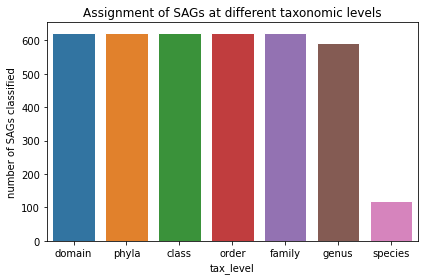

In [8]:
domain=classification[classification['domain']!='d__']
drows=len(domain)

phyla=classification[classification['phyla']!='p__']
prows=len(phyla)

cla=classification[classification['class']!='c__']
crows=len(cla)

order=classification[classification['order']!='o__']
orows=len(order)

family=classification[classification['family']!='f__']
frows=len(family)

genus=classification[classification['genus']!='g__']
grows=len(genus)

species=classification[classification['species']!='s__']
srows=len(species)

# create a plot showing how many cells are classified at each taxonomic level 
d={'tax_level': ['domain', 'phyla', 'class', 'order', 'family', 'genus','species'], 'number of SAGs classified': [drows, prows, crows, orows, frows, grows, srows]}
fig, ax = plt.subplots()
sns.set_style("white")
calssified=pd.DataFrame(data=d)
calssified
sns.set
sns.barplot(data=calssified, x='tax_level', y='number of SAGs classified')
ax.set_title('Assignment of SAGs at different taxonomic levels')

plt.tight_layout()
plt.savefig(images+"GTDB_taxonomic_levels.pdf")

In [9]:
classification=pd.read_csv(outdir+'Sintes_SAGs_gtdb_classify_wf_classifications_ar122_bac120.csv', index_col=0)

classification['phyla']=classification['phyla'].str[3:]
classification['class']=classification['class'].str[3:]
classification['order']=classification['order'].str[3:]
classification['family']=classification['family'].str[3:]
classification['genus']=classification['genus'].str[3:]
classification['species']=classification['species'].str[3:]

classification['GTDB_classification'] = classification['phyla']

classification.loc[classification['class'] != '', 'GTDB_classification'] = classification['class']
classification.loc[classification['order'] != '', 'GTDB_classification'] = classification['order']
classification.loc[classification['family'] != '', 'GTDB_classification'] = classification['family']
classification.loc[classification['genus'] != '', 'GTDB_classification'] = classification['genus']

classification

,SAG,GTDBtk_classification,classification_method,warnings,domain,phyla,class,order,family,genus,species,count,GTDB_classification
0,AH-558-A07,d__Archaea;p__Thermoplasmatota;c__Poseidoniia;...,taxonomic classification defined by topology a...,NaN,d__Archaea,Thermoplasmatota,Poseidoniia,Poseidoniales,Thalassarchaeaceae,MGIIb-O1,MGIIb-O1 sp002497895,1,MGIIb-O1
1,AH-558-A14,d__Archaea;p__Thermoproteota;c__Nitrososphaeri...,taxonomic classification defined by topology a...,NaN,d__Archaea,Thermoproteota,Nitrososphaeria,Nitrososphaerales,Nitrosopumilaceae,Nitrosopumilus,Nitrosopumilus sp002690535,1,Nitrosopumilus
2,AH-558-A16,d__Archaea;p__Thermoplasmatota;c__Poseidoniia;...,taxonomic classification defined by topology a...,Genome not assigned to closest species as it f...,d__Archaea,Thermoplasmatota,Poseidoniia,MGIII,CG-Epi1,CG-Epi1,,1,CG-Epi1
3,AH-558-A20,d__Archaea;p__Thermoproteota;c__Nitrososphaeri...,taxonomic classification defined by topology a...,Genome not assigned to closest species as it f...,d__Archaea,Thermoproteota,Nitrososphaeria,Nitrososphaerales,Nitrosopumilaceae,Nitrosopelagicus,,1,Nitrosopelagicus
4,AH-558-B13,d__Archaea;p__Thermoproteota;c__Nitrososphaeri...,taxonomic classification defined by topology a...,NaN,d__Archaea,Thermoproteota,Nitrososphaeria,Nitrososphaerales,Nitrosopumilaceae,Nitrosopumilus,Nitrosopumilus sp002690535,1,Nitrosopumilus
...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,AH-736-P17,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,taxonomic classification defined by topology a...,Genome not assigned to closest species as it f...,d__Bacteria,Proteobacteria,Gammaproteobacteria,Burkholderiales,Burkholderiaceae,UBA7377,,1,UBA7377
619,AH-736-P19,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,taxonomic classification defined by topology a...,Genome not assigned to closest species as it f...,d__Bacteria,Proteobacteria,Alphaproteobacteria,Pelagibacterales,Pelagibacteraceae,Pelagibacter,,1,Pelagibacter
620,AH-736-P20,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,taxonomic classification defined by topology a...,NaN,d__Bacteria,Proteobacteria,Gammaproteobacteria,SAR86,D2472,SAR86A,SAR86A sp004212975,1,SAR86A
621,AH-736-P22,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,ANI,NaN,d__Bacteria,Bacteroidota,Bacteroidia,Cytophagales,Marinoscillaceae,MED-G16,,1,MED-G16


In [10]:
Sintes_SAGs=Sintes_SAGs.merge(classification, how='left', left_on='name', right_on='SAG')
Sintes_SAGs.drop(columns=['SAG'], inplace=True)
Sintes_SAGs['GTDB_classification']=Sintes_SAGs['GTDB_classification'].fillna('Unclassified')

Sintes_SAGs['subgraph']=''
Sintes_SAGs['Cluster_GTDB_classification']=''
Sintes_SAGs.to_csv(outdir+'Sintes_surface_tetramer_decon_1cell_SAGs_GTDB_classification.csv')
Sintes_SAGs

,well,name,Plate,well_type,wga_cp,wgs_run_id,raw_read_count,final_assembly_length,max_contig_length,gc_content,...,phyla,class,order,family,genus,species,count,GTDB_classification,subgraph,Cluster_GTDB_classification
0,A01,AH-558-A01,AH-558,1 cell,15.934444,190222_NB502014_0102_AHHW3LAFXY,51.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unclassified,,
1,A02,AH-558-A02,AH-558,1 cell,15.934444,190222_NB502014_0102_AHHW3LAFXY,42198.0,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unclassified,,
2,A11,AH-558-A11,AH-558,1 cell,15.934444,190222_NB502014_0102_AHHW3LAFXY,1462924.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unclassified,,
3,A22,AH-558-A22,AH-558,1 cell,1.631078,190222_NB502014_0102_AHHW3LAFXY,10.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unclassified,,
4,B02,AH-558-B02,AH-558,1 cell,4.899164,190222_NB502014_0102_AHHW3LAFXY,1811927.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unclassified,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,P11,AH-736-P11,AH-736,1 cell,1.574596,AH-736,2765288.0,722775.0,117558.0,29.163571,...,Proteobacteria,Alphaproteobacteria,Pelagibacterales,Pelagibacteraceae,Pelagibacter,,1.0,Pelagibacter,,
835,P13,AH-736-P13,AH-736,1 cell,1.801092,AH-736,2757855.0,402041.0,51217.0,32.046483,...,Cyanobacteria,Cyanobacteriia,PCC-6307,Cyanobiaceae,Prochlorococcus_A,,1.0,Prochlorococcus_A,,
836,P14,AH-736-P14,AH-736,1 cell,1.492088,AH-736,2723082.0,411973.0,36833.0,49.780447,...,Thermoplasmatota,Poseidoniia,Poseidoniales,Thalassarchaeaceae,MGIIb-N1,MGIIb-N1 sp002495675,1.0,MGIIb-N1,,
837,P15,AH-736-P15,AH-736,1 cell,1.586822,AH-736,2683061.0,741505.0,95209.0,29.929131,...,Proteobacteria,Alphaproteobacteria,Pelagibacterales,Pelagibacteraceae,Pelagibacter,,1.0,Pelagibacter,,


In [11]:
SAGlen=Sintes_SAGs.shape[0]
GTDB_unclass=Sintes_SAGs['GTDB_classification'].str.count("Unclassified").sum()
print("The percent of SAGs classified after GTDB is "+ str(100-(GTDB_unclass/SAGlen)*100))



The percent of SAGs classified after GTDB is 72.70560190703218
